In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import arviz as az

In [2]:
N_samples = [30, 30, 30]
G_samples = [18, 18, 18]  
theta_dim = len(N_samples)

group_idxs = np.repeat(np.arange(len(N_samples)), N_samples)  # 3组
samples = []
for i in range(0, len(N_samples)):  # 逐组采样
    samples.extend(np.repeat([1, 0], [G_samples[i], N_samples[i] - G_samples[i]]))
samples = np.array(samples)

进行分层模型构建

In [3]:
with pm.Model() as hierachical_model:
    mu_beta = pm.Beta("mu_beta", 1, 1)
    sigma_beta = pm.HalfNormal("sigma_beta", 10)
    a = mu_beta * sigma_beta
    b = (1 - mu_beta) * sigma_beta
    theta = pm.Beta("theta", a, b, shape=theta_dim)
    y = pm.Bernoulli("y", p=theta[group_idxs], observed=samples)

模型结构

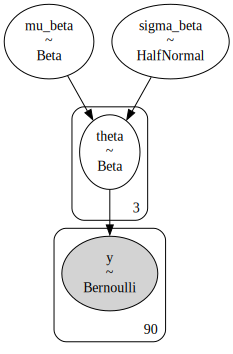

In [4]:
pm.model_to_graphviz(hierachical_model)

采样

In [5]:
with hierachical_model:
    # step = pm.Metropolis()
    # trace = pm.sample(5000, chains=3, step=step)
    trace = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 3 jobs)
NUTS: [mu_beta, sigma_beta, theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 17 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


总结后验

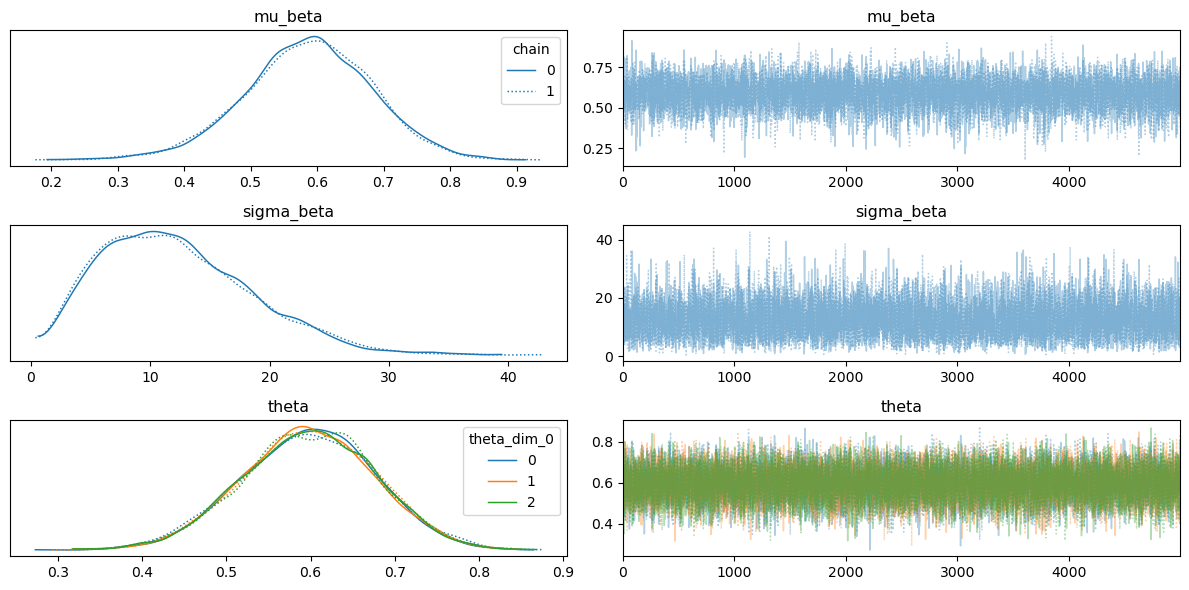

In [6]:
with hierachical_model:
    az.plot_trace(trace, compact=True, legend=True)
    plt.tight_layout()